# Lab 5 - self practice

## Objectives 
- understand how to compute covariance matrix from data
- and how to compute eigen-vectors and eigen-values

### Generating data ###

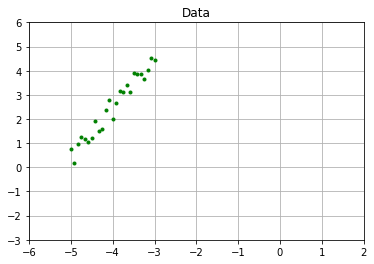

In [32]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles

# N is a sample size
N = 25
# we can fix a random seed. It allows us to get the same data
np.random.seed(10)
# form our data
x = np.linspace(-5, -3, N)
y = 10 + 2*x + np.random.random(size=(N,))
data = np.stack([x,y], axis = 1)


plt.title("Data")
plt.plot(data[:,0], data[:,1], '.', color="green")
plt.axis([-6, 2, -3, 6])
plt.grid('True')

### Center data

[[-1.         -1.72923602]
 [-0.91666667 -2.31313805]
 [-0.83333333 -1.53357509]
 [-0.75       -1.25175278]
 [-0.66666667 -1.33538298]
 [-0.58333333 -1.44242668]
 [-0.5        -1.3024938 ]
 [-0.41666667 -0.57335928]
 [-0.33333333 -0.99811249]
 [-0.25       -0.91221685]
 [-0.16666667 -0.14853018]
 [-0.08333333  0.28617002]
 [ 0.         -0.4966084 ]
 [ 0.08333333  0.17830227]
 [ 0.16666667  0.64539763]
 [ 0.25        0.6119694 ]
 [ 0.33333333  0.88786532]
 [ 0.41666667  0.62465274]
 [ 0.5         1.41721746]
 [ 0.58333333  1.38068579]
 [ 0.66666667  1.37532104]
 [ 0.75        1.14161338]
 [ 0.83333333  1.53945076]
 [ 0.91666667  2.00691029]
 [ 1.          1.94127651]]


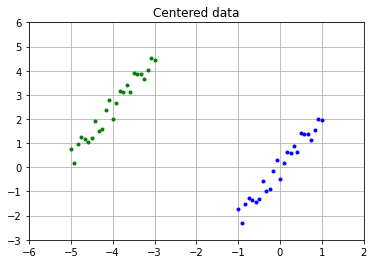

In [33]:
# center data by subtracting mean value from each feature
# pay attention to mean_vector <-- we need it later for restoring our data
# write 2 lines below
mean_vector = (data[:,0].mean(), data[:,1].mean()) # your code here
data_centered = data-mean_vector # your code here


plt.title("Centered data")
plt.plot(data[:,0], data[:,1], '.', color="green")
plt.plot(data_centered[:,0], data_centered[:,1], '.', color="blue")
plt.axis([-6, 2, -3, 6])
plt.grid('True')
print(data_centered)

### Covariance matrix

In [34]:
# calculate covariance matrix for our centered data

cov_mat = np.cov(data_centered.T) # your code here
print('Covariance matrix:\n', cov_mat)

# Cov(x, y) = (1 / (n - 1)) * Sum_i(x_i * y_i)
# also, to make sure you understand how to calculate covariance, calculate and print cov(X,Y)
# check that it is the same as in the covariance matrix
cov_xy = (1 / (len(data_centered) - 1)) * (np.sum([data_centered[i][0] * data_centered[i][1] for i in range (0, len(data_centered))])) # your code here
print('cov(X,Y):', cov_xy)

Covariance matrix:
 [[0.37615741 0.76801889]
 [0.76801889 1.65019543]]
cov(X,Y): 0.7680188927862999


### Eigenvectors and eigenvalues

In [35]:
# compute eigenvectors and eigenvalues, print them
eig_values, eig_vectors = np.linalg.eig(cov_mat) # your code here
print('eig_values:', eig_values)
print('eig_vectors:\n', eig_vectors)


# are they already in the needed order?
# if not, order eigenvectors and eigenvalues by eigenvalues, descending

idxs = np.argsort(eig_values)[::-1]
eig_values = eig_values[idxs]
eig_vectors = eig_vectors[:, idxs]

print('\nsorteed eig_values:', eig_values)
print('sorted eig_vectors:\n', eig_vectors)

# estimate variance retained by each principal component
retained_var = [eig_val/sum(eig_values) for eig_val in eig_values] # your code here
print('\nretained variance:',   retained_var)

eig_values: [0.01535567 2.01099716]
eig_vectors:
 [[-0.90509952 -0.42519979]
 [ 0.42519979 -0.90509952]]

sorteed eig_values: [2.01099716 0.01535567]
sorted eig_vectors:
 [[-0.42519979 -0.90509952]
 [-0.90509952  0.42519979]]

retained variance: [0.9924220143167379, 0.007577985683262181]


### Project data ###

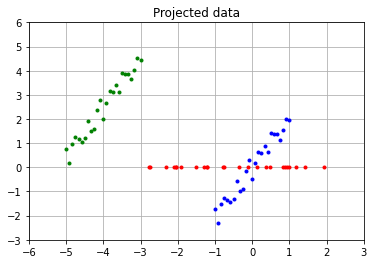

In [46]:
# project data to the first principal component
first_pc = eig_vectors[:, :1]
projected_data = np.dot(first_pc.T, data.T).T # your code here

plt.title("Projected data")
plt.plot(data[:,0], data[:,1], '.', color="green")
plt.plot(data_centered[:,0], data_centered[:,1], '.', color="blue")
plt.plot(projected_data, np.zeros(len(projected_data)), '.', color="red")
plt.axis([-6, 3, -3, 6])
plt.grid('True')

### Restore data back ###

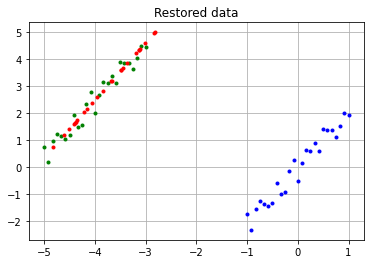

In [47]:
# Projected_data . first_pc.T + means
# project data back to initial space
# remember to add a mean_vector to the restored data

restored_data = np.dot(projected_data, first_pc.T) + mean_vector # your code here

plt.title("Restored data")
plt.plot(data[:,0], data[:,1], '.', color="green")
plt.plot(data_centered[:,0], data_centered[:,1], '.', color="blue")
plt.plot(restored_data[:,0], restored_data[:,1], '.', color="red")
#plt.axis([-6, 2, -3, 6])
plt.grid('True')
plt.show()